# 香港渣打馬拉松2016比賽如結果 資料分析
## DataSet 來源: https://www.kaggle.com/melvincheung/hong-kong-marathon-2016

In [97]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Challenge_data = pd.read_csv('hong-kong-marathon-2016/challenge.csv')
Run_data = pd.read_csv('hong-kong-marathon-2016/run1.csv')

plt.rcParams['figure.figsize'] = [15,10]

### 基本資料匯入
得到資料後，python 可正常讀取，共5616筆。

In [69]:
print(Challenge_data)
row,cols = Challenge_data.shape

      Overall_Position  Gender_Position  Category_Position Category  Race_No  \
0                    1                1                  1      MMS    21080   
1                    2                2                  1      MMI       14   
2                    3                3                  2      MMI        2   
3                    4                4                  2      MMS    21077   
4                    5                5                  3      MMI       18   
5                    6                6                  4      MMI       21   
6                    7                7                  3      MMS    21078   
7                    8                8                  4      MMS    21090   
8                    9                9                  5      MMS    21084   
9                   10               10                  5      MMI       12   
10                  11               11                  6      MMI       13   
11                  12               12 

### 基本分析
先將組別、國家區分出來，知道參賽者大概的情況。

Text(0.5, 1.0, 'Country')

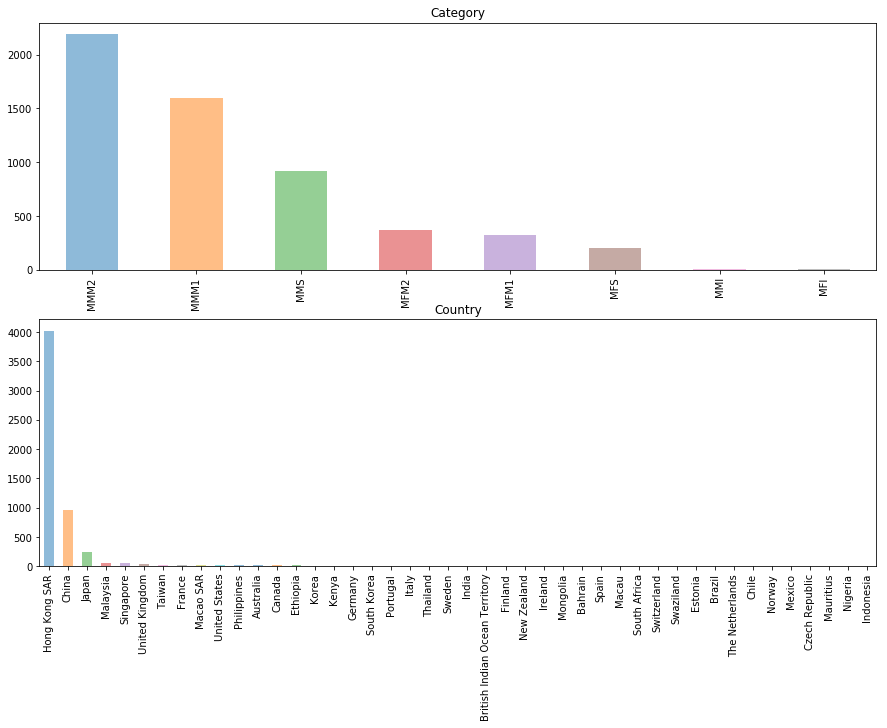

In [70]:
plt.subplot2grid((2,1),(0,0))
Challenge_data.Category.value_counts(normalize=False).plot(kind='bar',alpha=0.5)
plt.title('Category')

plt.subplot2grid((2,1),(1,0))
Challenge_data.Country.value_counts(normalize=False).plot(kind='bar',alpha=0.5)
plt.title('Country')

### 選手過濾
將所有組別中頭十名的選手以Category_Position過濾出來，這樣比較可以看到較強的選手的分佈。

In [84]:
df_top10 = Challenge_data[Challenge_data.Category_Position < 11]
df_top5 = Challenge_data[Challenge_data.Category_Position < 6]
df_winner = Challenge_data[Challenge_data.Category_Position < 2]
print(df_top10)

     Overall_Position  Gender_Position  Category_Position Category  Race_No  \
0                   1                1                  1      MMS    21080   
1                   2                2                  1      MMI       14   
2                   3                3                  2      MMI        2   
3                   4                4                  2      MMS    21077   
4                   5                5                  3      MMI       18   
5                   6                6                  4      MMI       21   
6                   7                7                  3      MMS    21078   
7                   8                8                  4      MMS    21090   
8                   9                9                  5      MMS    21084   
9                  10               10                  5      MMI       12   
10                 11               11                  6      MMI       13   
11                 12               12              

Text(0.5, 1.0, 'Country in Top 10')

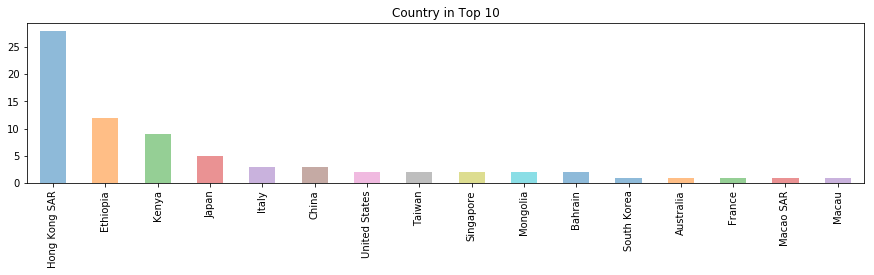

In [88]:
plt.subplot2grid((3,1),(0,0))
df_top10.Country.value_counts(normalize=False).plot(kind='bar',alpha=0.5)
plt.title('Country in Top 10')

Text(0.5, 1.0, 'Country in Top 5')

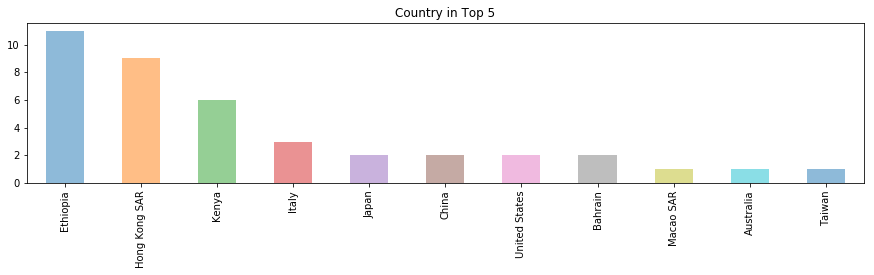

In [86]:
plt.subplot2grid((3,1),(1,0))
df_top5.Country.value_counts(normalize=False).plot(kind='bar',alpha=0.5)
plt.title('Country in Top 5')

Text(0.5, 1.0, 'Country in Winner Group')

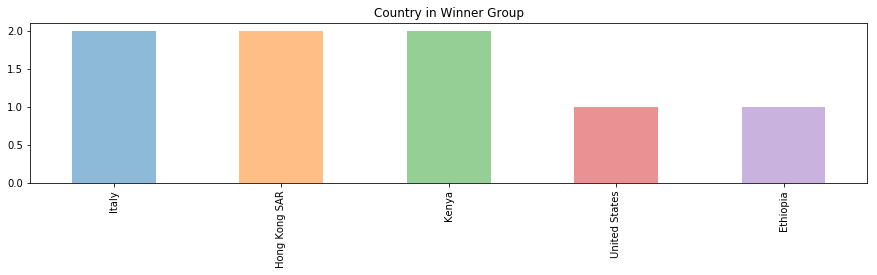

In [87]:
plt.subplot2grid((3,1),(2,0))
df_winner.Country.value_counts(normalize=False).plot(kind='bar',alpha=0.5)
plt.title('Country in Winner Group')

將選手們分別 **Top 10** 和 **Top 5** 組，分別進行分析。

#### Top 10 
在Top 10中，可見分佈的位置布著明顯的變動，人數最多的依舊是 Hong Kong SAR，但後續的Ethiopia 和 Kenya已經排在第2和第3位，變動較大的 Italy，在第20名的位置直接升上了第5位。

#### Top 5
在Top 5中，可見排名再次發生了變化，Hong Kong SAR到了第2名的位置，第1名由Ethiopia取代，後繼排名的變化較少。

#### 勝出者
在Winner Group，Italy、Hong Kong SAR、Kenya的人數相等，出乎意料地Ethiopia在Top 5的人數最多，卻只有1人取得第一名，較意外的United States在2人中就有1個得到了第一名。

### Top 5 時間分佈
這次改以Overall_Position進行排名，看看選手所有top5選手中，不同排名之間的時間差異。

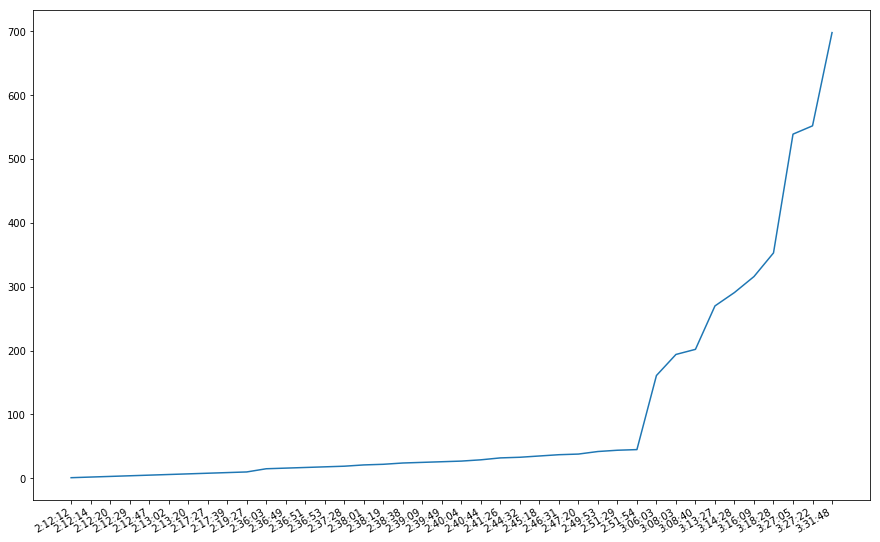

In [131]:
x = (df_top5.Official_Time).values
y = (df_top5.Overall_Position).values

plt.plot(x,y)
plt.gcf().autofmt_xdate()
plt.show()

在Top 5 的選手中，時間分佈的差距在前段時較多，但在接近Overall_Position接近100名時，時間的差距就慢慢被減少。這個現象在約350-550名之間特別明顯。